# Time Series Analysis - Predicting GDP -Spain




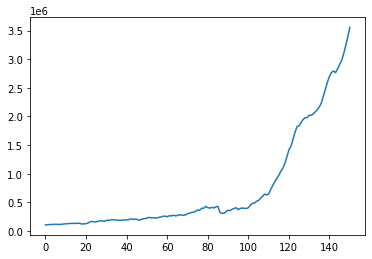

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

datos = pd.read_csv('Session7Data.csv', sep=";",decimal=",")
# print(datos)
y = datos.iloc[:,1]

# y=np.log(y)

plt.plot(y)
plt.show()

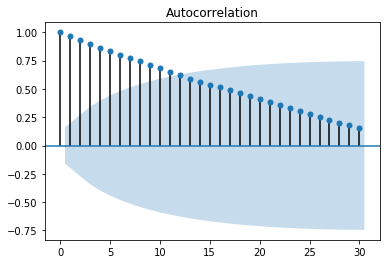

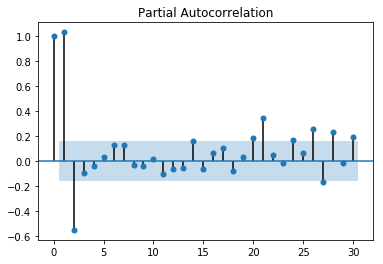

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 30 # play with this parameter

## Aquí si pongo 72 en nlags me da este error:
# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.
# The requested nlags 72 must be < 48.
plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags,method="ols")
plt.show()

In [4]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the original series
Statistic Value: 4.78302699708915
p-value: 1.0


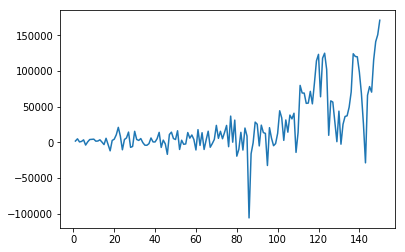

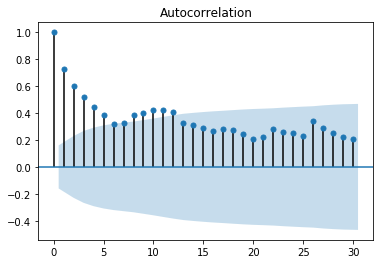

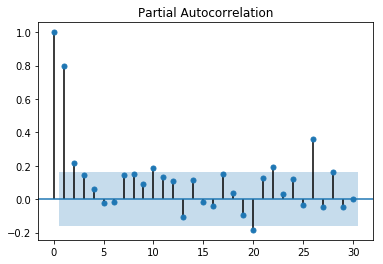

In [20]:
z = y.diff().dropna()

plt.plot(z)
plt.show()
plot_acf(z,lags=nlags)
plt.show()
plot_pacf(z,lags=nlags,method="ols")
plt.show()

In [8]:

adf_test = sm.tsa.stattools.adfuller(z,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test after taking one difference")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test after taking one difference
Statistic Value: -1.5828983376293617
p-value: 0.49217829967069304


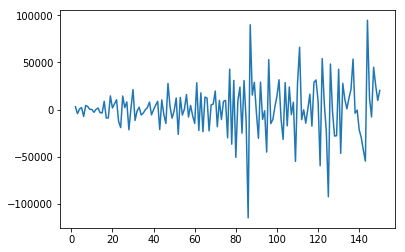

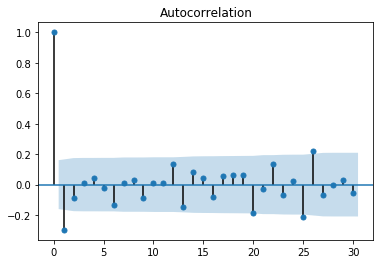

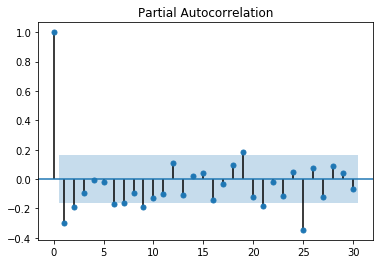

In [21]:
zz = z.diff().dropna()

plt.show()
plt.plot(zz)
plt.show()
plot_acf(zz,lags=nlags)
plt.show()
plot_pacf(zz,lags=nlags,method="ols")
plt.show()

# zz2 = y.diff(1).diff(1).dropna() # in case we need two differences
# plt.plot(zz2)

In [8]:
adf_test = sm.tsa.stattools.adfuller(zz,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test after taking two differences")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test after taking two differences
Statistic Value: -11.712065135030247
p-value: 1.4808531613119564e-21


C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:         D2.GDP (Spain)   No. Observations:                  149
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1723.384
Method:                       css-mle   S.D. of innovations          25507.868
Date:                Thu, 17 Feb 2022   AIC                           3452.768
Time:                        15:24:57   BIC                           3461.779
Sample:                             2   HQIC                          3456.429
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1066.6161   1217.085      0.876      0.381   -1318.828    3452.060
ma.L1.D2.GDP (Spain)    -0.4207      0.088     -4.784      0.000      -0.593      -0.248
            

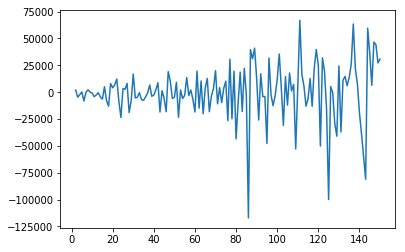

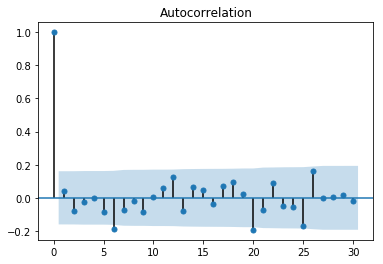

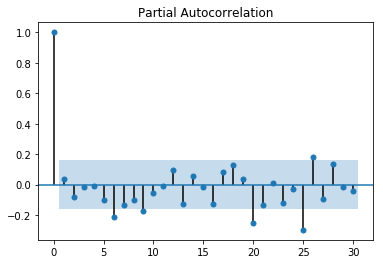

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = ARIMA(y, order = (0,2,1))
model_fit=model.fit(disp=0)
print(model_fit.summary())
# print("Coefficients",fit_fit.params)

residuos=model_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags,method="ols")
plt.show()

In [12]:
adf_test = sm.tsa.stattools.adfuller(residuos,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the residuals")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])

ADF test for the residuals
Statistic Value: -11.56065794182781
p-value: 3.2763784035155738e-21


Ljung-Box: Statistic value [32.99381302] p-value [0.13122283]
Shapido: Statistic value 0.9173281788825989 p-value 1.549592241190112e-07


C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


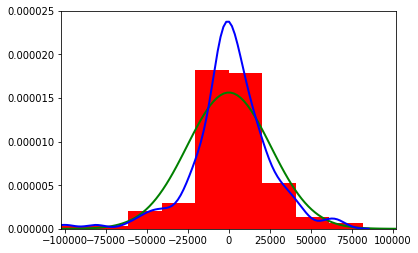

In [15]:
# Box test for autocorrelations

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[25])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -4*sigma, mu +4*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 4*std, mean + 4*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 4*std, mean + 4*std)

plt.show()

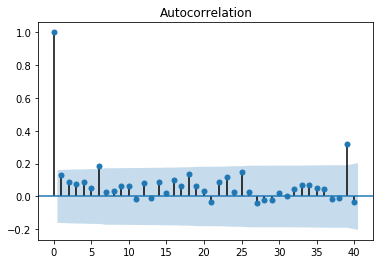

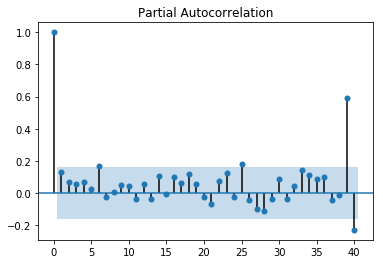

Ljung-Box for squared residuals
Statistic value [21.99912851] p_value [0.34055793]


In [17]:
# Study the squared residuals for SWN

plot_acf(residuos**2,lags=nlags)
plt.show()
plot_pacf(residuos**2,lags=nlags,method="ols")
plt.show()

box_test2 = sm.stats.acorr_ljungbox(residuos**2, lags=[20])
print("Ljung-Box for squared residuals")
print("Statistic value",box_test2[0],"p_value",box_test2[1])

In [12]:
y_pred = model_fit.forecast(steps = 5)
print("point predictions",y_pred[0])
print("forecasting errors",y_pred[1])

point predictions [3718178.76047182 3878483.03703872 4039853.92970068 4202291.43845771
 4365795.56330982]
forecasting errors [ 25507.86830841  47682.03694622  72839.10682808 100912.27592598
 131695.07231819]


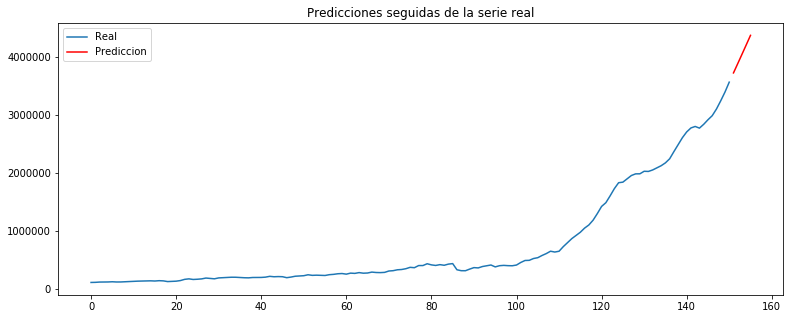

In [13]:
ind = [i for i in y.index]
y_predicciones = pd.Series(y_pred[0], index = range(len(ind), len(ind) + 5)) 

# figsize = (length_axis_x, length_axix_y)

plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_predicciones, 'r', label = 'Prediccion')
plt.legend()
plt.title('Predicciones seguidas de la serie real')
plt.show()

In [35]:
std = np.std(residuos)

quantile_2_5=np.quantile(residuos, 0.025)
quantile_97_5=np.quantile(residuos, 0.975)

print("95% confidence intervals using quantiles")
print("Lower limit 2.5%:",quantile_2_5,"Upper limit 97.5%:",quantile_97_5)

print("95% confidence intervals assuming normality")
print("Normal Percentile 2.5%:",-1.96*std,"Normal Percentile 97.5%:",1.96*std)

95% confidence intervals using quantiles
Lower limit 2.5%: -55098.37183406174 Upper limit 97.5%: 44974.56129574679
95% confidence intervals assuming normality
Normal Percentile 2.5%: -49995.70130013375 Normal Percentile 97.5%: 49995.70130013375
